In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

2024-10-27 13:55:54.638778: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 13:55:54.641364: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 13:55:54.650370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 13:55:54.666342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 13:55:54.670862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 13:55:54.682177: I tensorflow/core/platform/cpu_feature_gu

In [7]:
# Load the datasets
wb = pd.read_csv('me/wb_clean.csv')  # Training data
gw = pd.read_csv('me/gw_clean.csv')  # Validation data

In [10]:
data = wb[wb['year'].isin([2021, 2022, 2023, 2024])]
data.year.unique()

array([2021, 2022, 2023, 2024])

Epoch 1/100


/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 44.6940 - val_loss: 110.7187
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 42.2494 - val_loss: 105.1791
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 38.8154 - val_loss: 96.2668
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 33.2611 - val_loss: 82.2838
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 25.0394 - val_loss: 63.3878
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.1698 - val_loss: 42.4253
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.2175 - val_loss: 23.8571
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.9538 - val_loss: 11.7531
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2264 - val_loss: 7.2951
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8304 - val_loss: 8.5101
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3682 - val_loss: 12.1532
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0322 - 

Model saved successfully!
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


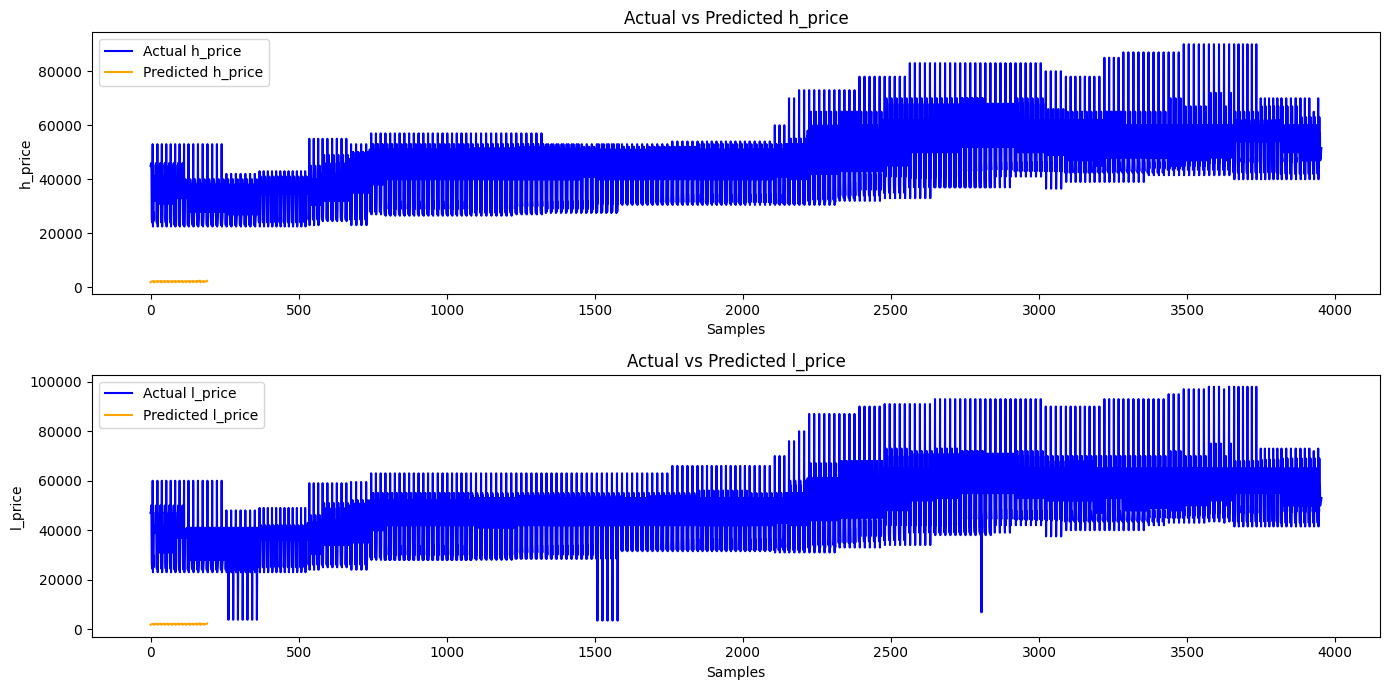

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Load the datasets
wb = pd.read_csv('me/wb_clean.csv')  # Training data
gw = pd.read_csv('me/gw_clean.csv')  # Validation data
wb = wb[wb['year'].isin([2022])]
gw = gw[gw['year'].isin([2022])]
# Drop missing values
wb = wb.dropna()
gw = gw.dropna()

# Prepare target (y) and features (X) for training
# Here, y is multi-output: [h_rice, l_rice]
y_train = np.log1p(wb[['h_rice', 'l_rice']].values)
y_val = np.log1p(gw[['h_price', 'l_price']].values)

# Select features for training and validation
X_train = np.log1p(wb[['h_rice', 'l_rice', 'year', 'month']].values)
X_val = np.log1p(gw[['h_price', 'l_price', 'year', 'month']].values)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step (for one-month ahead predictions)
X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])

# Prepare test data (if needed, you can load it similarly)
# If you have a separate test dataset, you can load and prepare it like this:
gw_test = pd.read_csv('me/gw_clean.csv') # Test data example (if you have it)
wb_test = pd.read_csv('me/wb_clean.csv')
gw_test = gw_test[gw_test['year'].isin([2022])]
wb_test = wb_test[wb_test['year'].isin([2022])]

y_test = np.log1p(gw_test[['h_price', 'l_price']].values)
X_test = np.log1p(wb_test[['h_rice', 'l_rice', 'year', 'month']].values)
X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Now your data is ready for training the LSTM model.


# Reshape X to fit LSTM input shape (samples, time_steps, features)
# time_steps = 1  # Single time step (since we are doing one-month ahead predictions)
# X_train = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
# X_val = X_val.reshape(X_val.shape[0], time_steps, X_val.shape[1])
# X_test = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the trained model to a file
model.save('combined_h_l_price_prediction_model.h5')
print("Model saved successfully!")

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the datasets
wb = pd.read_csv('me/wb_clean.csv')  # World Bank data
gw = pd.read_csv('me/gw_clean.csv')  # E-commerce data

# Drop missing values
wb = wb.dropna()
gw = gw.dropna()

# Optionally, add a source column to distinguish datasets
wb['source'] = 'world_bank'
gw['source'] = 'ecommerce'

# Combine the datasets
data = pd.concat([wb, gw], ignore_index=True)

# Prepare target (y) and features (X)
y = np.log1p(data[['h_price', 'l_price']].values)
X = np.log1p(data[['h_price', 'l_price','year', 'month']].values)  # Include source if needed

# Convert categorical 'source' column to numeric
X = pd.get_dummies(data[['year', 'month', 'source']], drop_first=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
time_steps = 1  # Single time step for predictions
X_scaled = X_scaled.reshape(X_scaled.shape[0], time_steps, X_scaled.shape[1])

# Split the data into training and validation sets
n_train = int(0.8 * len(X_scaled))  # 80% for training
X_train, X_val = X_scaled[:n_train], X_scaled[n_train:]
y_train, y_val = y[:n_train], y[n_train:]

# Build the BiLSTM model for multi-output prediction
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))  # Input shape (time_steps, features)
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2))  # Output layer: Predicting two values (h_price and l_price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the trained model to a file
model.save('combined_h_l_price_prediction_model.h5')
print("Model saved successfully!")

# Predict using the test set
predictions = model.predict(X_test)

# Undo the log transformation for actual values and predictions
predictions = np.expm1(predictions)
y_test = np.expm1(y_test)

# Plot actual vs predicted values for h_price
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test[:, 0], label='Actual h_price', color='blue')
plt.plot(predictions[:, 0], label='Predicted h_price', color='orange')
plt.title('Actual vs Predicted h_price')
plt.xlabel('Samples')
plt.ylabel('h_price')
plt.legend()

# Plot actual vs predicted values for l_price
plt.subplot(2, 1, 2)
plt.plot(y_test[:, 1], label='Actual l_price', color='blue')
plt.plot(predictions[:, 1], label='Predicted l_price', color='orange')
plt.title('Actual vs Predicted l_price')
plt.xlabel('Samples')
plt.ylabel('l_price')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100


/home/lillian/Documents/workme/me/mlzoomcamp/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


356/356 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: nan - val_loss: nan
Epoch 2/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/100
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan


Model saved successfully!


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 4 and 3 for '{{node sequential_9_1/bidirectional_18_1/forward_lstm_18_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_9_1/bidirectional_18_1/forward_lstm_18_1/strided_slice_1, sequential_9_1/bidirectional_18_1/forward_lstm_18_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [32,4], [3,200].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(32, 4), dtype=float32)
  • states=('tf.Tensor(shape=(32, 50), dtype=float32)', 'tf.Tensor(shape=(32, 50), dtype=float32)')
  • training=False

In [31]:
wb = pd.read_csv('me/wb_clean.csv')  # World Bank data
gw = pd.read_csv('me/gw_clean.csv')  # E-commerce data
wb = wb[wb['year'].isin([2022])]
gw = gw[gw['year'].isin([2022])]

In [32]:
# Drop missing values
wb = wb.dropna()
gw = gw.dropna()

# Optionally, add a source column to distinguish datasets
wb['source'] = 'world_bank'
gw['source'] = 'ecommerce'


In [33]:
wb.h_rice.unique()

array([ 704.12,  724.17,  793.14,  830.17,  822.63,  873.2 ,  919.99,
        922.3 ,  974.  , 1028.  , 1057.14, 1118.85,  667.33,  675.56,
        741.14,  778.04,  725.19,  752.35,  775.  ,  819.7 ,  881.66,
        986.83, 1055.81, 1107.95,  726.03,  723.14,  791.72,  830.5 ,
        842.33,  867.81,  845.86,  940.  , 1034.  , 1096.01, 1081.  ,
       1156.26,  659.31,  670.7 ,  741.47,  771.29,  773.77,  834.08,
        873.18,  911.  ,  958.21, 1010.05,  986.36, 1035.59,  721.16,
        722.18,  791.3 ,  832.16,  785.94,  839.63,  857.19,  893.  ,
       1090.78, 1097.8 , 1122.42,  667.81,  667.22,  721.  ,  755.07,
        736.  ,  830.  ,  878.12,  894.7 ,  917.57,  941.7 ,  967.2 ,
       1049.  ,  667.71,  678.85,  740.85,  773.34,  841.36,  932.54,
       1003.  , 1067.32,  999.15, 1013.24, 1033.85, 1104.  ,  674.  ,
        705.62,  783.  ,  825.03,  829.79,  947.76,  995.46, 1044.22,
       1095.98, 1150.9 ,  769.77,  770.01,  781.8 ,  830.99,  883.69,
        988.21,  989

In [34]:
gw.h_price.unique()

array([45000, 46000, 43000, 25500, 24000, 32000, 53000, 22500, 28000,
       24500, 40000, 38000, 41000, 39000, 37000, 31000, 23000, 29000,
       38500, 36000, 33000, 36500, 35000, 23800, 26500, 35500, 42000,
       27000, 34500, 25000, 28500, 55000, 44000, 30500, 26000, 30000,
       47000, 49000, 47500, 26200, 33500, 29500, 27500, 50000, 48000,
       51000, 57000, 52000, 51500, 28700, 48500, 31500, 31800, 40500,
       54000, 60000, 31200, 70000, 73000, 56000, 58000, 65000, 32500,
       34000, 78000, 62000, 59000, 63000, 61000, 68000, 83000, 60500,
       46500, 43500, 52500, 62500, 80000, 66000, 42500, 85000, 87000,
       41500, 90000, 67000, 64000, 72000])